In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [62]:
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [63]:
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [65]:
sum(df.State == 'Tamil Nadu')

9994

In [66]:
df = df.drop(columns=['State'])
df = df.drop(columns=['Order ID'])
# Change the data type of 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Check for duplicate rows
df.duplicated().sum()

# Drop duplicate rows
df = df.drop_duplicates()

df['Sales'].describe()

df['Discount'].describe()


count    9994.000000
mean        0.226817
std         0.074636
min         0.100000
25%         0.160000
50%         0.230000
75%         0.290000
max         0.350000
Name: Discount, dtype: float64

In [67]:
df

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
0,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28
1,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80
2,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60
4,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45
...,...,...,...,...,...,...,...,...,...
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10
9990,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70
9991,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44
9992,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24


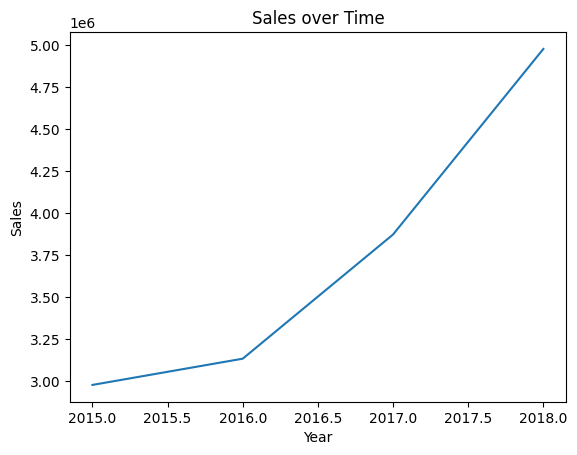

In [89]:
sales_by_year = df.groupby('Year')['Sales'].sum()

sales_by_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales over Time')
plt.show()


Top 3 selling categories:
Category
Eggs, Meat & Fish    2267401
Snacks               2237546
Food Grains          2115272
Name: Sales, dtype: int64


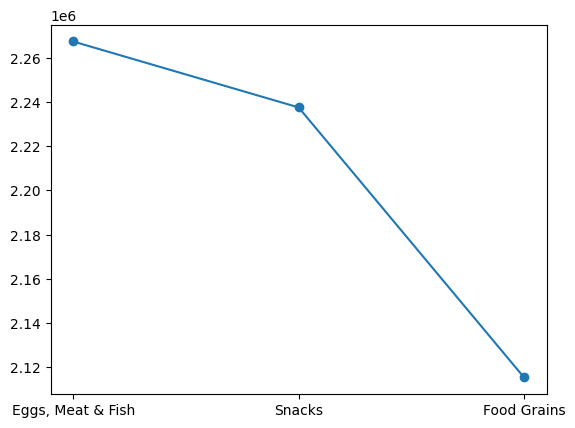

In [87]:
grouped_df = df.groupby('Category')['Sales'].sum()

sorted_df = grouped_df.sort_values(ascending=False)

top_n = 3
print(f"Top {top_n} selling categories:")
print(sorted_df.head(top_n))
plt.plot(sorted_df.head(top_n),marker='o');

<Axes: ylabel='Sales'>

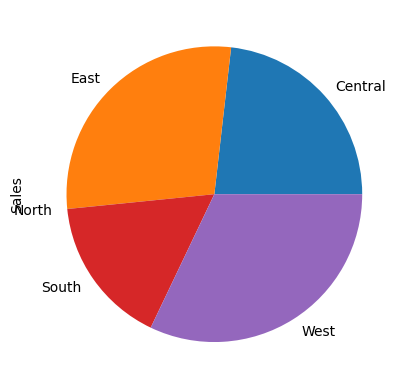

In [70]:
# df.groupby('Category')['Sales'].sum().plot(kind='bar')

df.groupby('Region')['Sales'].sum().plot(kind='pie')


<Axes: xlabel='Region'>

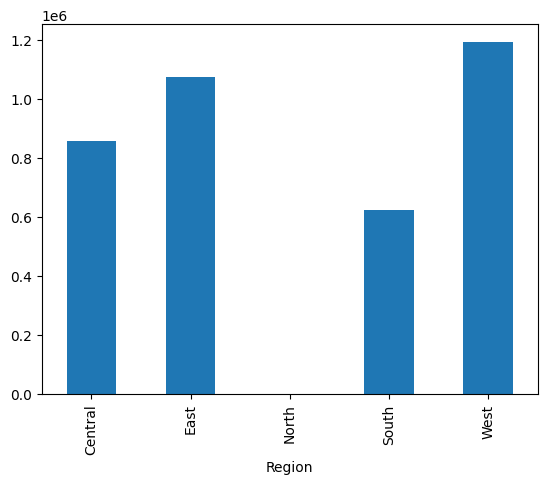

In [60]:
df.groupby('Region')['Profit'].sum().plot.bar()

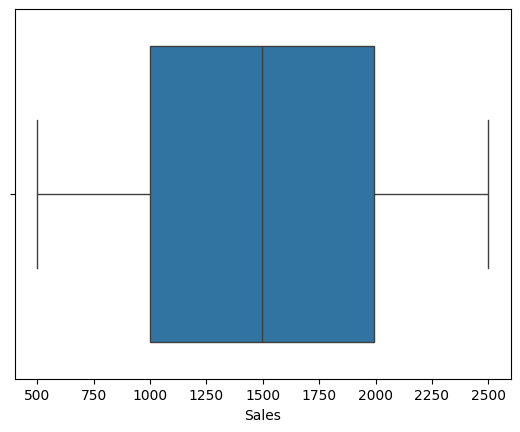

In [58]:
sns.boxplot(df,x='Sales');

In [54]:
import warnings

# Ignore all warnings (not recommended in general)
warnings.filterwarnings("ignore")

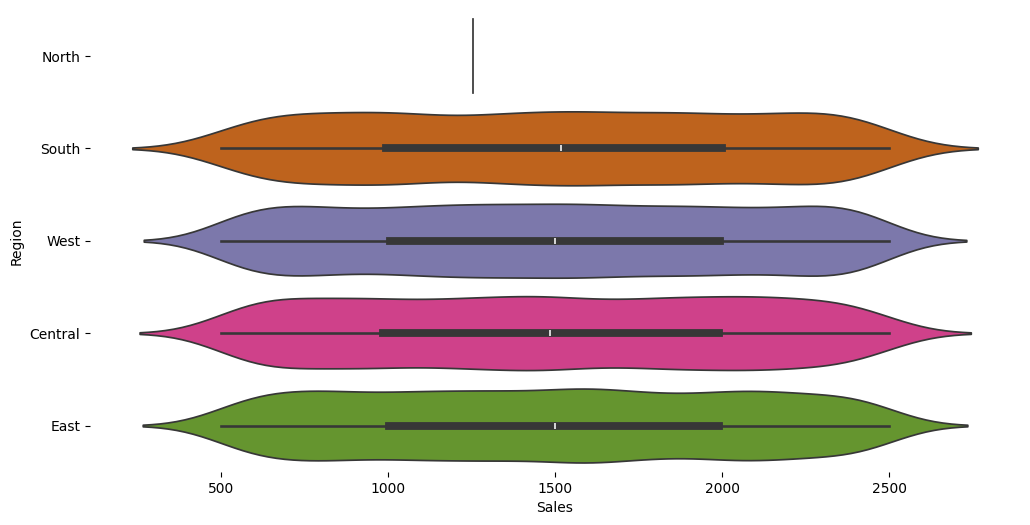

In [55]:
figsize = (12, 1.2 * len(df['Region'].unique()))
plt.figure(figsize=figsize);
sns.violinplot(df, x='Sales', y='Region', inner='box', palette='Dark2');
sns.despine(top=True, right=True, bottom=True, left=True);

<Axes: xlabel='Category'>

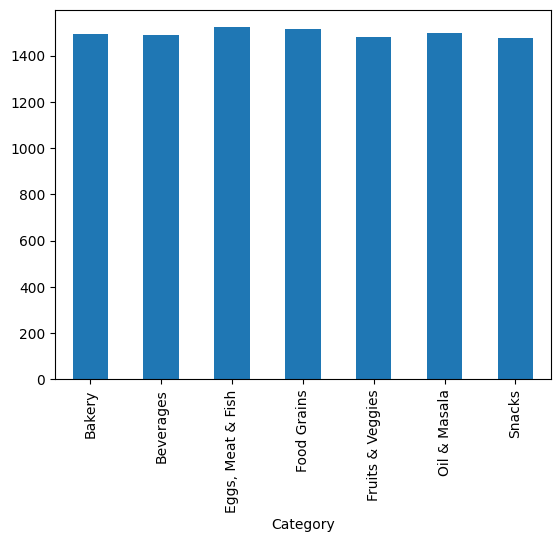

In [43]:

# Create a bar chart showing average sales for each category.
df.groupby('Category')['Sales'].mean().plot.bar()

<Axes: xlabel='Order Date'>

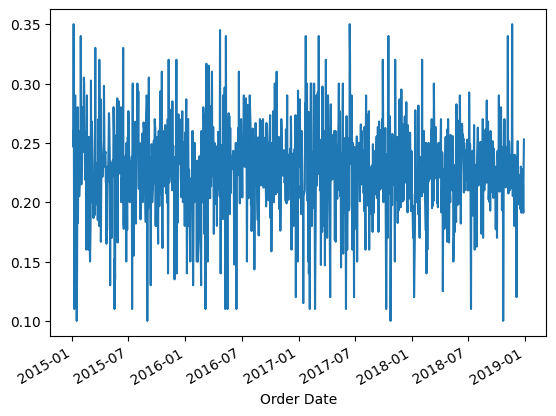

In [44]:

# Create a line chart showing the trend of average discount over time.
df.groupby('Order Date')['Discount'].mean().plot.line()

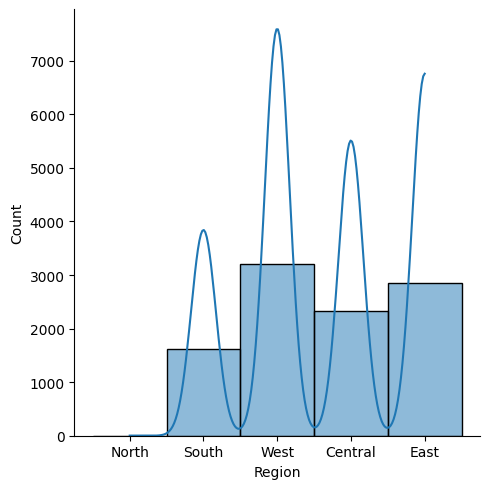

In [49]:
sns.displot(df['Region'],kde=True)
plt.show()